In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv("./train.csv")
x = data_train[data_train.columns[0:18]]
y = data_train[data_train.columns[18]]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

x_train = x_train.to_numpy().reshape(-1, 18)
x_val = x_val.to_numpy().reshape(-1, 18)
x_test = pd.read_csv("./test.csv").to_numpy().reshape(-1, 18)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape)

(989, 18) (330, 18) (330, 18)
(989,) (330,)


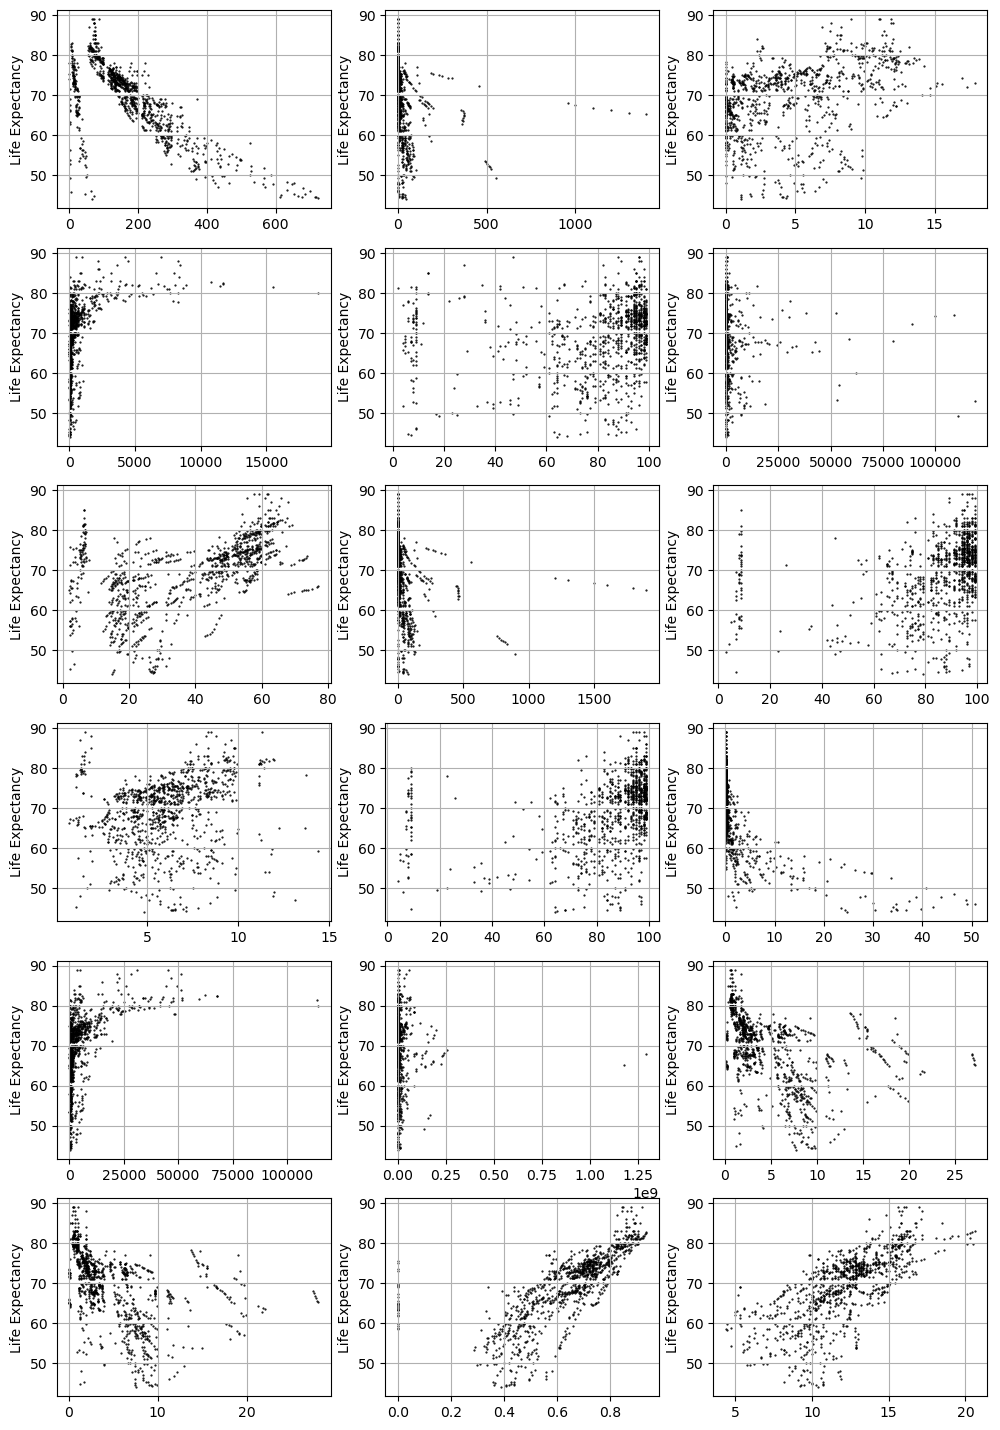

In [3]:
plt.figure(figsize=(12, 18))

for j in range(0, 18, 1):
    plt.subplot(6, 3, j + 1)
    plt.scatter(x_train[:, j], y_train, s=0.3, color='k')
    plt.ylabel("Life Expectancy")
    plt.grid()

plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_val_scaled = ss.transform(x_val)
x_test_scaled = ss.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

y_pred = lr.predict(x_test_scaled) # Baseline 성능 평가에 활용

print("계수:", lr.coef_)
print("절편:", lr.intercept_)

print("학습용:", lr.score(x_train_scaled, y_train))
print("검증용:", lr.score(x_val_scaled, y_val))

계수: [ -2.32632766  11.55958512  -0.3698876    0.596953    -0.16159229
  -0.11893076   0.67303727 -11.73635916   0.33396793   0.32159039
   0.24637229  -2.69009689   0.21899174  -0.13679475  -0.0145408
  -0.22497891   1.84048679   2.33087417]
절편: 69.06420626895854
학습용: 0.8456857893767463
검증용: 0.7969142359640335
